# Notebook Content

In this notebook, we will explore and perform preprocessing on the [Hotel Reviews Dataset](https://github.com/RaihanAk/Hotel-Review-Sentiment-Analysis_MachineLearning).

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import sqlite3 as sql
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize.treebank import TreebankWordDetokenizer
from textblob import TextBlob

## Read Dataset

In [2]:
df = pd.read_csv('hotel_reviews.csv')
df

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [3]:
df.shape

(38932, 5)

## Check Nulls 

In [4]:
df.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

**There is no null values in our data.**

## Check Duplicate

In [5]:
df.duplicated().sum()

0

**There is no duplicated doc in our data.**

# Preprocessing Data

## Delete Numbers and Punctuation 

In [6]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df['Description'] = df.Description.map(alphanumeric).map(punc_lower)
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,the room was kind of clean but had a very stro...,Edge,Mobile,not happy
1,id10327,i stayed at the crown plaza april april ...,Internet Explorer,Mobile,not happy
2,id10328,i booked this hotel through hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,not happy


In [7]:
df['Description']

0        the room was kind of clean but had a very stro...
1        i stayed at the crown plaza april      april  ...
2        i booked this hotel through hotwire at the low...
3        stayed here with husband and sons on the way t...
4        my girlfriends and i stayed here to celebrate ...
                               ...                        
38927    we arrived late at night and walked in to a ch...
38928    the only positive impression is location and p...
38929    traveling with friends for shopping and a show...
38930    the experience was just ok  we paid extra for ...
38931    the westin is a wonderfully restored grande da...
Name: Description, Length: 38932, dtype: object

In [8]:
count_vectorizer = CountVectorizer(stop_words='english')

doc_word = count_vectorizer.fit_transform(df.Description)
pd.DataFrame(doc_word.toarray(), columns=count_vectorizer.get_feature_names())

,aa,aaa,aaaa,aaaaalll,aaaagh,aaaah,aaaahhhhhhhhh,aaaandddd,aaah,aaahhh,...,èuropean,être,ùber,über,übercomfortable,いつもではありませんが,どちらに行くにも駅やバス停が目の前ですので便利です,初めてサンフランシスコを訪れましたが,日本語を話すスタッフの方がいらっしゃいます,清潔で快適な滞在ができました
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Oops! there are languages other than English language, also there are a lot of repeated letters in some words. We will try to handle theis troubles.**

## Clean Text Methods

In [9]:
def clean_text(text):
    """
    This method will be called to clean the text from puncutation, numbers, stop-words, empty-tokens, and words with 
    one letter.
    """
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df['Description'] = df['Description'].apply(lambda x: clean_text(x))

In [10]:
def keep_english(text):
    """
    This method will be called to remove any language other than English.
    """
    text = re.sub("[^a-zA-Z]+", " ", text)
    return text
df['Description'] = df['Description'].apply(lambda x: keep_english(x))

## Stemming and Lemmatization

In [11]:
df['Description']

0        room kind clean strong smell dogs generally av...
1        stayed crown plaza april april staff friendly ...
2        booked hotel hotwire lowest price could find g...
3        stayed husband sons way alaska cruise loved ho...
4        girlfriends stayed celebrate th birthdays plan...
                               ...                        
38927    arrived late night walked check area completel...
38928    positive impression location public parking op...
38929    traveling friends shopping show location great...
38930    experience ok paid extra view pool got view pa...
38931    westin wonderfully restored grande dame hotel ...
Name: Description, Length: 38932, dtype: object

In [12]:
def apply_stem(text):
    """
    This method will be called to stems the last few characters of a word.
    """
    text_split = text.split(' ')
    stem_text = ''
    for text in text_split:
        stem_text += stemmer.stem(text) + ' '
    return stem_text
def apply_lem(text):
    """
    This method will be called to converts the word to its meaningful base form.
    """
    text_split = text.split(' ')
    lem_v_text = ''
    for text in text_split:
        lem_v_text += lemmy.lemmatize(text, pos='v') + ' '
        text_split = lem_v_text.split(' ')
        lem_text =''
    for text in text_split:
        lem_text += lemmy.lemmatize(text, pos='a') + ' '
    return lem_text

In [13]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [14]:
df['Description_stemmed'] = df['Description'].apply(apply_stem)
df['Description_lemmed'] = df['Description'].apply(apply_lem)
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Description_stemmed,Description_lemmed
0,id10326,room kind clean strong smell dogs generally av...,Edge,Mobile,not happy,room kind clean strong smell dog gener averag ...,room kind clean strong smell dog generally ave...
1,id10327,stayed crown plaza april april staff friendly ...,Internet Explorer,Mobile,not happy,stay crown plaza april april staff friendli at...,stay crown plaza april april staff friendly at...
2,id10328,booked hotel hotwire lowest price could find g...,Mozilla,Tablet,not happy,book hotel hotwir lowest price could find got ...,book hotel hotwire low price could find get fr...
3,id10329,stayed husband sons way alaska cruise loved ho...,InternetExplorer,Desktop,happy,stay husband son way alaska cruis love hotel g...,stay husband sons way alaska cruise love hotel...
4,id10330,girlfriends stayed celebrate th birthdays plan...,Edge,Tablet,not happy,girlfriend stay celebr th birthday plan weeken...,girlfriends stay celebrate th birthdays plan w...


In [15]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Description_stemmed,Description_lemmed
0,id10326,room kind clean strong smell dogs generally av...,Edge,Mobile,not happy,room kind clean strong smell dog gener averag ...,room kind clean strong smell dog generally ave...
1,id10327,stayed crown plaza april april staff friendly ...,Internet Explorer,Mobile,not happy,stay crown plaza april april staff friendli at...,stay crown plaza april april staff friendly at...
2,id10328,booked hotel hotwire lowest price could find g...,Mozilla,Tablet,not happy,book hotel hotwir lowest price could find got ...,book hotel hotwire low price could find get fr...
3,id10329,stayed husband sons way alaska cruise loved ho...,InternetExplorer,Desktop,happy,stay husband son way alaska cruis love hotel g...,stay husband sons way alaska cruise love hotel...
4,id10330,girlfriends stayed celebrate th birthdays plan...,Edge,Tablet,not happy,girlfriend stay celebr th birthday plan weeken...,girlfriends stay celebrate th birthdays plan w...


**We conclude:**
- The lemmatization process doesn’t cut things off, it transforms the words to the actual root.
- The stemming process does cut things off, it increases error for the words more than transform to the actual root.
- As a result, will approved the **Description_lemmed** in our analysis.

In [16]:
df_temp = df[:300].copy()

In [17]:
def correct_spell(text):
    blob=TextBlob(text)
    return blob.correct()
df_temp['Description_lemmed'] = df_temp['Description_lemmed'].apply(correct_spell)

## Classify the Reviews 

In [18]:
df.Is_Response.value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [19]:
def classify_Response(Response):
    """
    This method is called to classify the customer's response into one of two categories, either Positive or negative.
    """
    if (Response == 'happy'):
        return 'positive'
    else:
        return 'negative'

In [20]:
df['sentiment']= df.Is_Response.apply(classify_Response)

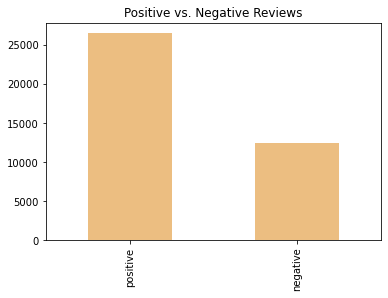

In [21]:
df.sentiment.value_counts().plot(kind='bar', color ='#ECBE81' );
plt.title('Positive vs. Negative Reviews');

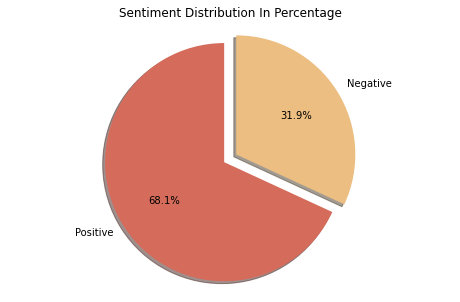

In [22]:
plt.figure(figsize=(8,5))
labels= ['Positive', 'Negative']
colors=['#D56C5B', '#ECBE81']
sizes= [26521, 12411]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',shadow=True, explode=[0.1,0.02])
plt.axis('equal')
plt.title("Sentiment Distribution In Percentage")
plt.show()

**As indicated, positive reviews are higher than negative reviews. Positive reviews are represent 68.1% from the data.**

## Remove Meaningless words

In [23]:
flat_review = " ".join(df['Description_lemmed'].values)
flat_review=word_tokenize(flat_review)

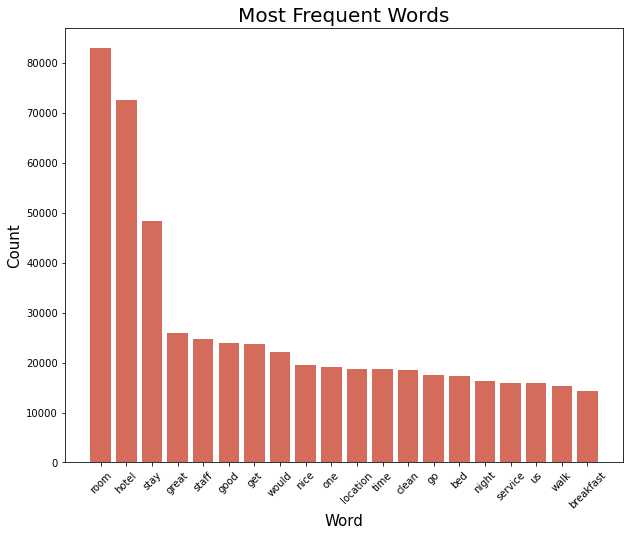

In [24]:
fre=FreqDist(flat_review)
fre.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre.most_common(20):
    plt.bar(k,v, color='#D56C5B')

As we have seen, words like: **room**, **hotel**, **get** etc.. are too frequent and meaningless in our analysis. So, we need to remove them.

### First Attemp to Remove Meaningless Words

In [25]:
stop_words = stopwords.words("english")
for word in ["room","hotel","get","stay","would","one","bed","night","us","go"]:
    stop_words.append(word)

In [26]:
flat_review_no_stop = [word for word in flat_review if word not in stop_words]

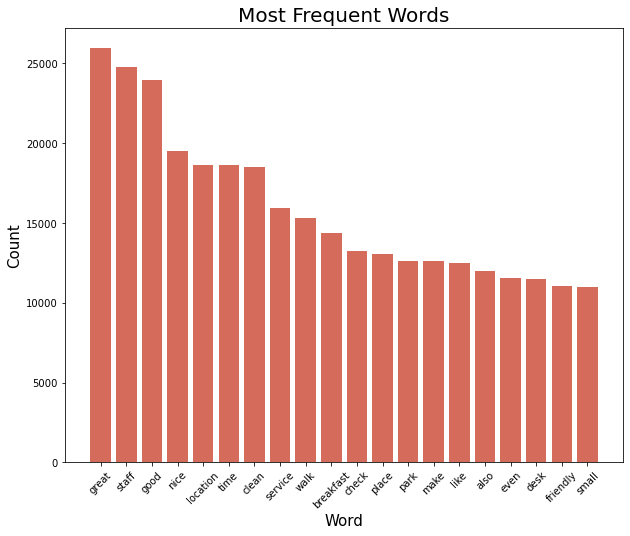

In [27]:
fre_2=FreqDist(flat_review_no_stop)
fre_2.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_2.most_common(20):
    plt.bar(k,v, color='#D56C5B')

As we have seen, words like: **walk**, **also**, **even** etc.. are too frequent and meaningless in our analysis. So, we need to remove them.

### Second Attemp to Remove Meaningless Words

In [28]:
for word in ["staff","walk","also","make","even","check","service"]:
    stop_words.append(word)

In [29]:
flat_review_no_stop_2 = [word for word in flat_review_no_stop if word not in stop_words]

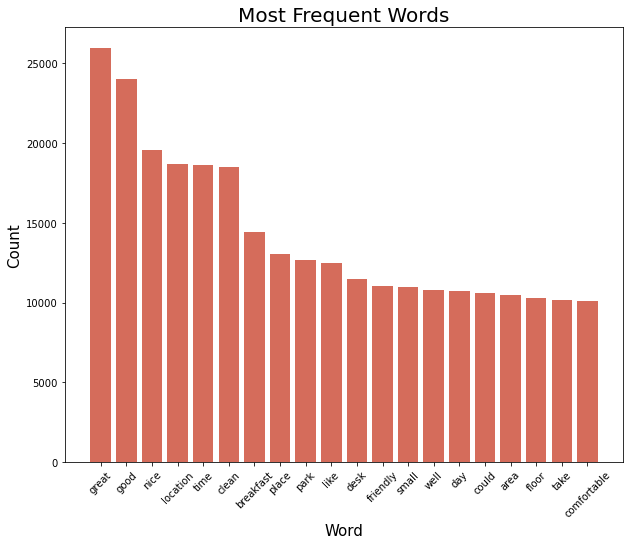

In [30]:
fre_3=FreqDist(flat_review_no_stop_2)
fre_3.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_3.most_common(20):
    plt.bar(k,v, color='#D56C5B')

As we have seen, words like: **could**, **find**, **take** etc.. are too frequent and meaningless in our analysis. So, we need to remove them.

### Third Attemp to Remove Meaningless Words

In [31]:
for word in ["could","front","find","place","floor","take","day"]:
    stop_words.append(word)

In [32]:
flat_review_no_stop_3 = [word for word in flat_review_no_stop_2 if word not in stop_words]

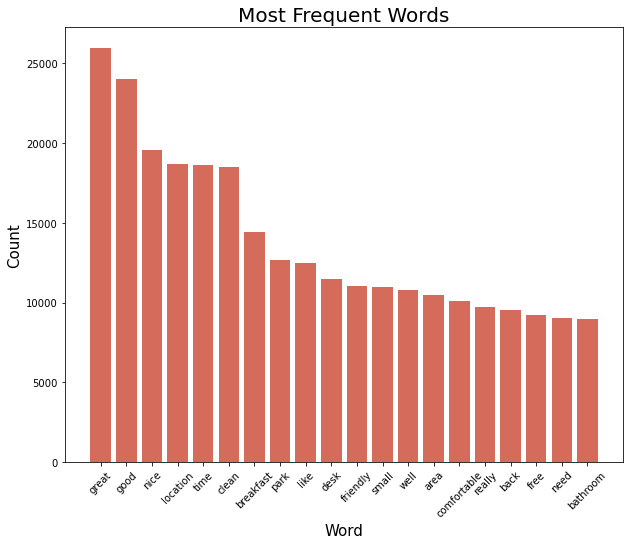

In [33]:
fre_4=FreqDist(flat_review_no_stop_3)
fre_4.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_4.most_common(20):
    plt.bar(k,v, color='#D56C5B')

As we have seen, words like: **really**, **say**, **need** etc.. are too frequent and meaningless in our analysis. So, we need to remove them.

### Fourth Attemp to Remove Meaningless Words

In [34]:
for word in ["really", "back","free","look","say","need"]:
    stop_words.append(word)

In [35]:
flat_review_no_stop_4 = [word for word in flat_review_no_stop_3 if word not in stop_words]

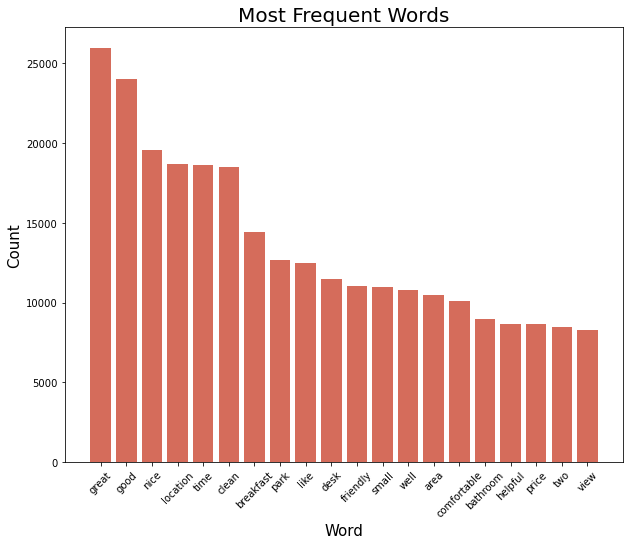

In [36]:
fre_5=FreqDist(flat_review_no_stop_4)
fre_5.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_5.most_common(20):
    plt.bar(k,v, color='#D56C5B')

As we have seen, words like: **two**, **next**, **give** etc.. are too frequent and meaningless in our analysis. So, we need to remove them.

### Fifth and Last Attemp to Remove Meaningless Words

In [37]:
for word in ["two", "use","want","next","come","new","book","give","first","know","door","work", 
             "th", 'let', 'hilton', 'ok', 'another', 'tell', 'within', 'good', 'nice', 'great', 'friendly', 'like'
             , 'think', 'lot', 'comfortable', 'clean', 'ask','time', 'location','hotels','morning','include','people','manager','san','inn','block','area',"water","wed","pm","things","little","breakfast","right","price","restaurants"
            , 'desk']:
    stop_words.append(word)

In [38]:
flat_review_no_stop_5 = [word for word in flat_review_no_stop_4 if word not in stop_words]

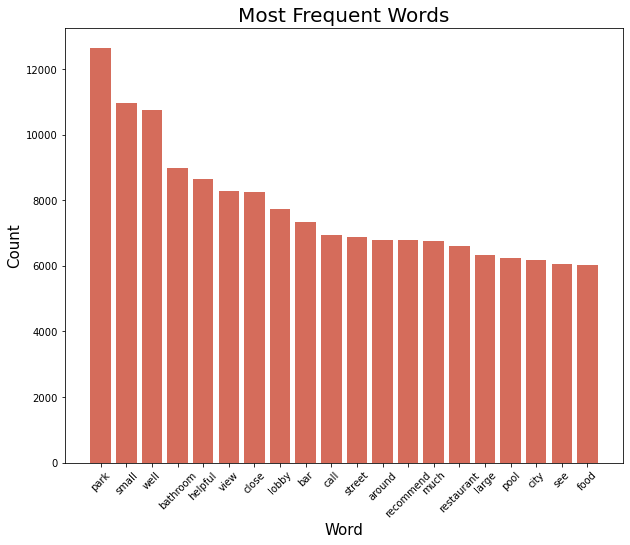

In [39]:
fre_6=FreqDist(flat_review_no_stop_5)
fre_6.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Words', fontsize=20)
for k, v in fre_6.most_common(20):
    plt.bar(k,v, color='#D56C5B')

As shown in the above figure, now most of the frequent words have meaning in our analysis. So, we don't need to remove more words.

### Drop New Stop Words 

In [40]:
def remove_stop(text):
    """
    This method will be called to remove the new added stop-words from the reviews.
    """
    word= word_tokenize(text)
    word = [x for x in word if x not in stop_words]
    return word
def untoken(text):
    """
    This method will be called to untoken the text.
    """
    text= TreebankWordDetokenizer().detokenize(text)
    return text
df['Description_lemmed'] = df['Description_lemmed'].apply(lambda x: remove_stop(x))
df['Description_lemmed'] = df['Description_lemmed'].apply(lambda x: untoken(x))

In [41]:
df['Description_lemmed']

0        kind strong smell dog generally average overni...
1        crown plaza april april attentive elevators ti...
2        hotwire low smoke argue baby smoke hear anythi...
3        husband sons way alaska cruise love experience...
4        girlfriends celebrate birthdays plan weekend g...
                               ...                        
38927    arrive late completely flood fan run everywher...
38928    positive impression public park opposite site ...
38929    travel friends shop show best average hallway ...
38930    experience pay extra view pool view palm tree ...
38931    westin wonderfully restore grande dame linens ...
Name: Description_lemmed, Length: 38932, dtype: object

## Drop unneeded columns

In [42]:
df = df.drop(['User_ID','Browser_Used','Device_Used','Is_Response'], axis=1)

In [43]:
df.head()

,Description,Description_stemmed,Description_lemmed,sentiment
0,room kind clean strong smell dogs generally av...,room kind clean strong smell dog gener averag ...,kind strong smell dog generally average overni...,negative
1,stayed crown plaza april april staff friendly ...,stay crown plaza april april staff friendli at...,crown plaza april april attentive elevators ti...,negative
2,booked hotel hotwire lowest price could find g...,book hotel hotwir lowest price could find got ...,hotwire low smoke argue baby smoke hear anythi...,negative
3,stayed husband sons way alaska cruise loved ho...,stay husband son way alaska cruis love hotel g...,husband sons way alaska cruise love experience...,positive
4,girlfriends stayed celebrate th birthdays plan...,girlfriend stay celebr th birthday plan weeken...,girlfriends celebrate birthdays plan weekend g...,negative


## Drop Wrong Words 

In [44]:
def remove_dup(text):
    """
    This method will be called to remove the words with repeated letters, which makes the word meaningless.
    """
    text= word_tokenize(text)
    for idx, word in enumerate(text):
        count=0
        lis =[]
        for i in range(len(word)):
            if i >0:
                if word[i] == word[i-1]:
                    if word[i] not in lis:
                          lis.append(word[i])
                    count+=1
        if (len(lis)>1) & (count >3):
            print(text[idx])
            text.pop(idx)
        elif (count > 1) & (len(lis)==1):
            print(text[idx])
            text.pop(idx)  
    return text  

In [45]:
df['Description_lemmed']= df.Description_lemmed.apply(remove_dup)

fullfilled
soooo
aaa
kitchnettett
aaa
aaa
aaa
aaa
mmmmmmmmmmmm
prepossess
aaa
rooom
aaa
aaa
ahhhh
winnning
mmmm
voodoo
xxxxx
surrrounded
wwhhhhaaat
nooooo
beeen
aaa
sooo
mmmmmm
mooo
mooo
soooo
sooo
metroopensdoors
admisssion
soooo
foolproof
sooo
roooms
bussiness
soooooo
arrrived
jazzzione
ooops
mmmmm
sooo
urrrrrrm
evvvvveeeerrrr
aaa
aaa
aaa
veeeery
assessment
soooo
sooooooo
aaa
needee
neighboorhood
recommmendations
stressless
toooo
marrriot
sooooo
mmm
aaa
aaa
ummmm
sooo
www
www
xliii
aaa
aaa
reeeeaked
hmmm
slooooow
betweeen
volleyball
classiness
soooo
terrrace
aaa
soooo
sooo
aaa
aaa
hmmmshould
aaa
aaa
zzzz
www
literallly
slooooooow
aaargh
bbb
voodoo
sooooo
soooooooooo
huuuuge
stafff
sooooo
sooooo
www
aaa
soooo
aaa
difffernet
hmmm
bathrooom
gallleria
aaa
grrrr
mmmm
commooooon
connnie
wayyyy
mmmm
aaa
neeed
cooold
soooooo
soooooo
looooooong
ummm
fullly
geeesh
hmmm
bussiness
freeee
aaa
sooo
aaa
atttentious
suuuper
www
sooo
volleyball
classiness
atttitude
bookwood
wirelesss
bussiness
soooo


In [46]:
df['Description_lemmed']

0        [kind, strong, smell, dog, generally, average,...
1        [crown, plaza, april, april, attentive, elevat...
2        [hotwire, low, smoke, argue, baby, smoke, hear...
3        [husband, sons, way, alaska, cruise, love, exp...
4        [girlfriends, celebrate, birthdays, plan, week...
                               ...                        
38927    [arrive, late, completely, flood, fan, run, ev...
38928    [positive, impression, public, park, opposite,...
38929    [travel, friends, shop, show, best, average, h...
38930    [experience, pay, extra, view, pool, view, pal...
38931    [westin, wonderfully, restore, grande, dame, l...
Name: Description_lemmed, Length: 38932, dtype: object

In [47]:
df['Description_lemmed']= df.Description_lemmed.apply(untoken)
df.head()

,Description,Description_stemmed,Description_lemmed,sentiment
0,room kind clean strong smell dogs generally av...,room kind clean strong smell dog gener averag ...,kind strong smell dog generally average overni...,negative
1,stayed crown plaza april april staff friendly ...,stay crown plaza april april staff friendli at...,crown plaza april april attentive elevators ti...,negative
2,booked hotel hotwire lowest price could find g...,book hotel hotwir lowest price could find got ...,hotwire low smoke argue baby smoke hear anythi...,negative
3,stayed husband sons way alaska cruise loved ho...,stay husband son way alaska cruis love hotel g...,husband sons way alaska cruise love experience...,positive
4,girlfriends stayed celebrate th birthdays plan...,girlfriend stay celebr th birthday plan weeken...,girlfriends celebrate birthdays plan weekend g...,negative


## Store Data in SQL

In [48]:
conn = sql.connect('cleaned_rev.db')

In [49]:
df.to_sql('cleaned_rev', conn)

ValueError: Table 'cleaned_rev' already exists.